In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import svm
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
house_price_dataframe= pd.read_csv('清洗数据.csv')

In [3]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Outlier
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Outlier
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Normal
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Normal
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Normal


In [4]:
house_price_dataframe =house_price_dataframe.drop('label',axis=1)

In [5]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
X = house_price_dataframe.drop(['Price'],axis=1)
Y = house_price_dataframe['Price']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

### 线性回归-默认参数

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [18]:
Y_train_predict = regressor.predict(X_train)
r_train = metrics.r2_score(Y_train_predict, Y_train)
mse_train = mean_squared_error(Y_train_predict, Y_train)
print(r_train)
print(mse_train)

0.3928997626781199
0.46807733618720837


In [20]:
Y_test_predict = regressor.predict(X_test)
r_test = metrics.r2_score(Y_test_predict, Y_test)
mse_test = mean_squared_error(Y_test_predict, Y_test)
print(r_test)
print(mse_test)

0.38293437463382374
0.4491397859173321


In [24]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

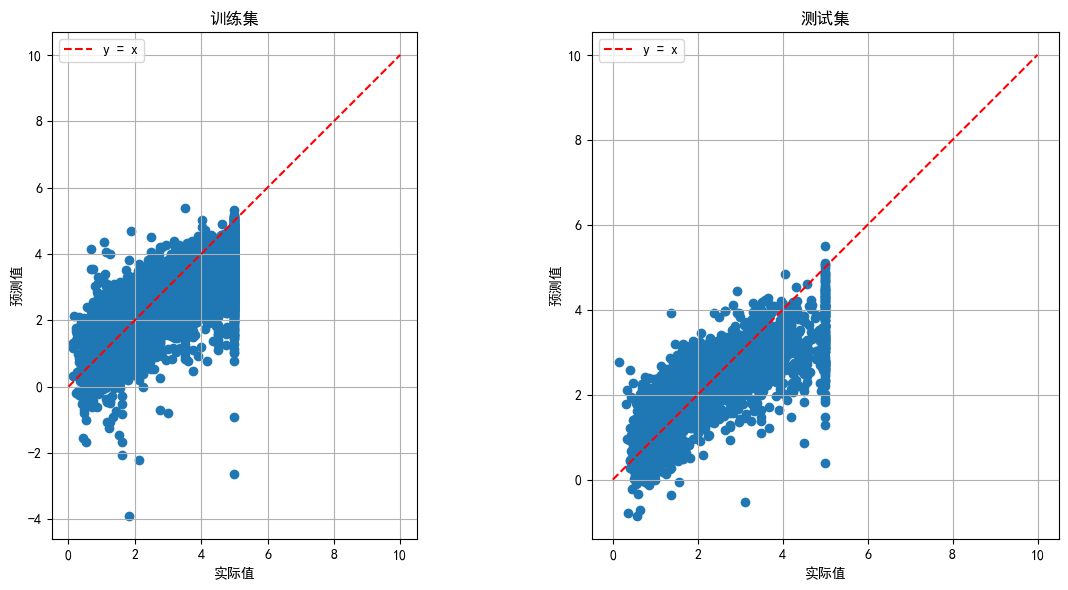

In [26]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_predict)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_predict)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("线性回归-清洗数据.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

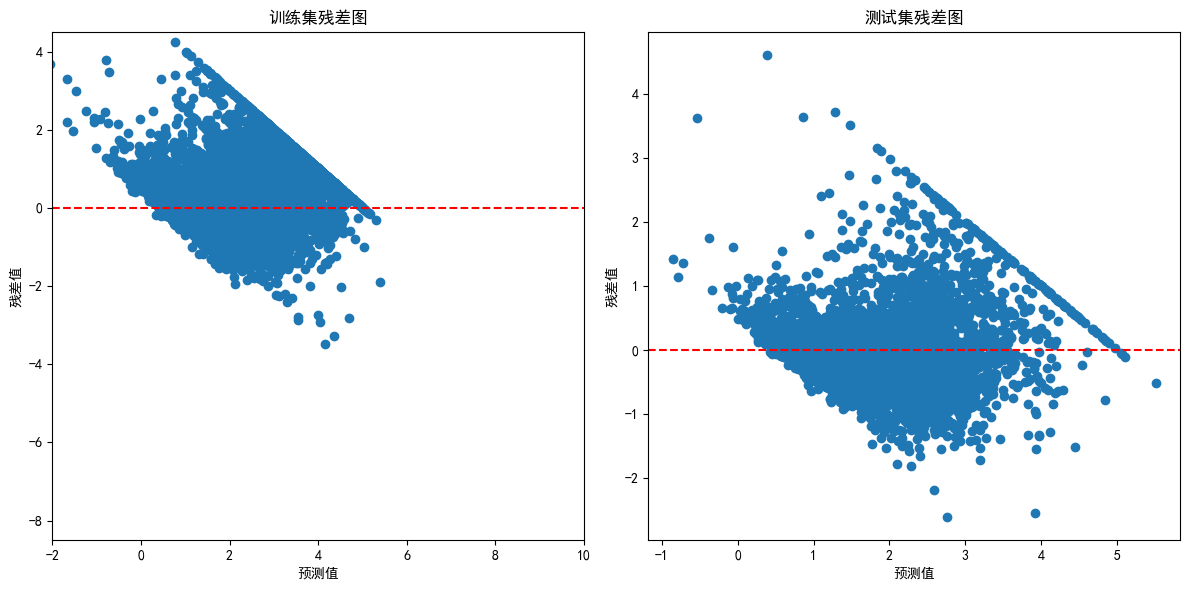

In [28]:
residuals_train = Y_train-Y_train_predict
residuals_test = Y_test-Y_test_predict
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(Y_train_predict, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_predict, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("线性回归-清洗数据-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

In [30]:
classifier = svm.SVR()
classifier.fit(X_train,Y_train)

SVR()

In [31]:
Y_train_pred = classifier.predict(X_train)
r2_train = metrics.r2_score(Y_train,Y_train_pred)
print(r2_train)
mse_train = mean_squared_error(Y_train,Y_train_pred)
print(mse_train)

-0.022123026602630436
1.2664946174917804


In [32]:
Y_test_pred = classifier.predict(X_test)
r2_test = metrics.r2_score(Y_test,Y_test_pred)
print(r2_test)
mse_test = mean_squared_error(Y_test,Y_test_pred)
print(mse_test)

-0.024632635368191824
1.2217162580685115


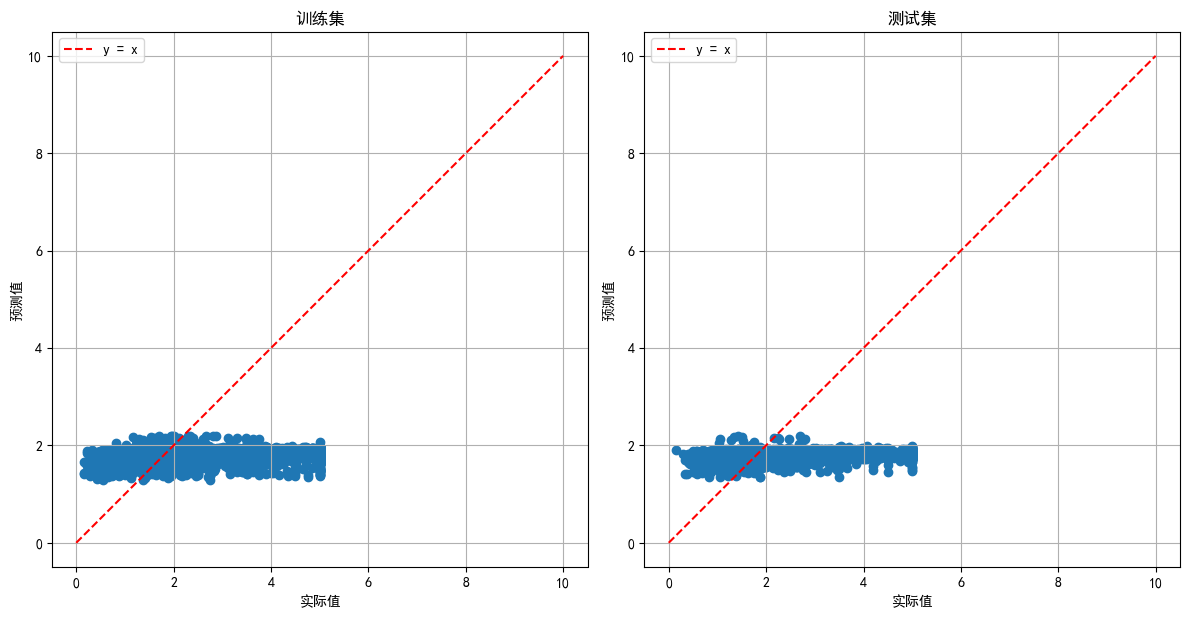

In [36]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_pred)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_pred)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("SVR-清洗数据.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

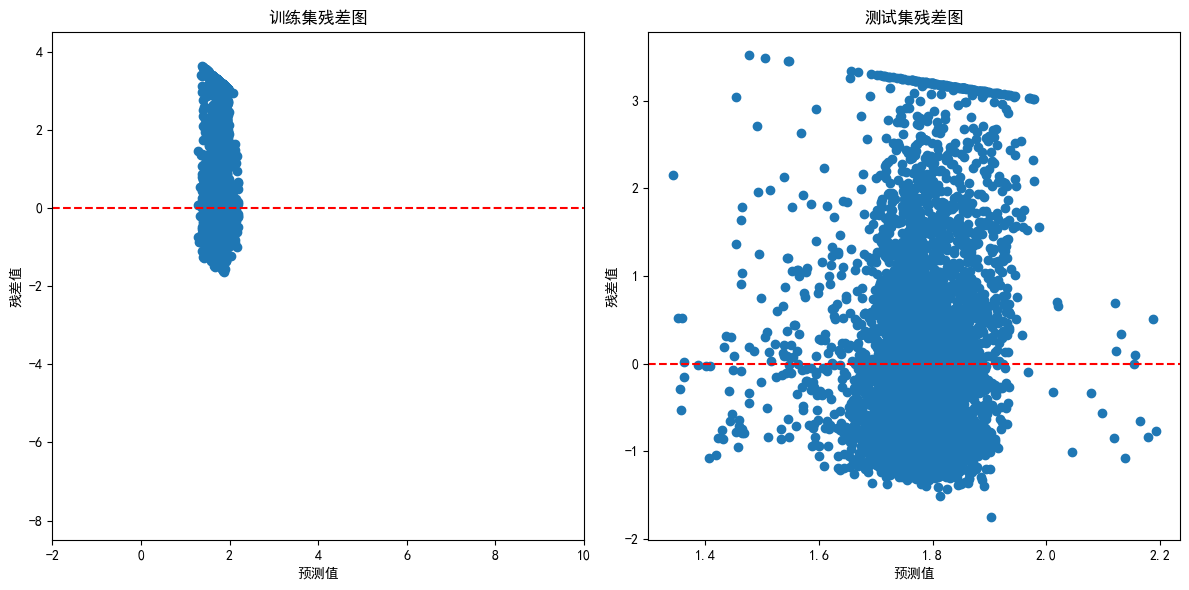

In [40]:
residuals_train = Y_train-Y_train_pred
residuals_test = Y_test-Y_test_pred
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(Y_train_pred, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_pred, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("SVR-清洗数据-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

In [72]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 输入层和第一个隐藏层
model.add(Dense(32, activation='relu'))  # 第二个隐藏层
model.add(Dense(1))  # 输出层，回归问题通常只有一个输出节点

In [74]:
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [76]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
812/812 [==============================] - 1s 969us/step - loss: 11.3235 - val_loss: 2.1163
Epoch 2/100
812/812 [==============================] - 1s 880us/step - loss: 3.7556 - val_loss: 1.2531
Epoch 3/100
812/812 [==============================] - 1s 819us/step - loss: 4.9592 - val_loss: 0.8032
Epoch 4/100
812/812 [==============================] - 1s 808us/step - loss: 9.6483 - val_loss: 0.7594
Epoch 5/100
812/812 [==============================] - 1s 859us/step - loss: 9.3679 - val_loss: 2.2046
Epoch 6/100
812/812 [==============================] - 1s 833us/step - loss: 3.9149 - val_loss: 2.9031
Epoch 7/100
812/812 [==============================] - 1s 821us/step - loss: 5.4595 - val_loss: 0.7471
Epoch 8/100
812/812 [==============================] - 1s 831us/step - loss: 1.9300 - val_loss: 1.7042
Epoch 9/100
812/812 [==============================] - 1s 844us/step - loss: 2.6652 - val_loss: 0.6408
Epoch 10/100
812/812 [==============================] - 1s 834us/step - 

In [78]:
Y_train_pred = model.predict(X_train)
r2_train = metrics.r2_score(Y_train,Y_train_pred)
print(r2_train)
mse_train = mean_squared_error(Y_train,Y_train_pred)
print(mse_train)

508/508 [==============================] - 0s 550us/step
0.6299102387541999
0.4585716967599893


In [80]:
Y_test_pred = model.predict(X_test)
r2_test = metrics.r2_score(Y_test,Y_test_pred)
print(r2_test)
mse_test = mean_squared_error(Y_test,Y_test_pred)
print(mse_test)

127/127 [==============================] - 0s 550us/step
0.6123114596613173
0.46225874176691495
